# Data Cleaning

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

In [5]:
#parse data
df_index = pd.read_csv("oci_2015_datasd.csv")
df_collisions = pd.read_csv("pd_collisions_datasd.csv")
df_traffic = pd.read_csv("traffic_counts_datasd.csv")
df_meters = pd.read_csv("treas_parking_meters_loc_datasd.csv")

#drop OCI columns
df_index.drop( columns = "seg_id", inplace = True )
df_index.drop( columns = "oci_wt", inplace = True )
df_index.drop( columns = "pvm_class", inplace = True )
df_index.drop( columns = "func_class", inplace = True )
df_index.drop( columns = "oci_desc", inplace = True )

#drop collision columns
df_collisions.drop( columns = "report_id", inplace = True )
df_collisions.drop( columns = "date_time", inplace = True )
df_collisions.drop( columns = "street_no", inplace = True )
df_collisions.drop( columns = "street_dir", inplace = True )
df_collisions.drop( columns = "cross_st_dir", inplace = True )
df_collisions.drop( columns = "violation_section", inplace = True )
df_collisions.drop( columns = "violation_type", inplace = True )
df_collisions.drop( columns = "charge_desc", inplace = True )
df_collisions.drop( columns = "injured", inplace = True )
df_collisions.drop( columns = "killed", inplace = True )
df_collisions.drop( columns = "hit_run_lvl", inplace = True )
df_collisions.drop( columns = "police_beat", inplace = True )

#drop traffic columns
df_traffic.drop( columns = "id", inplace = True )
df_traffic.drop( columns = "all_count", inplace = True )
df_traffic.drop( columns = "northbound_count", inplace = True )
df_traffic.drop( columns = "southbound_count", inplace = True )
df_traffic.drop( columns = "eastbound_count", inplace = True )
df_traffic.drop( columns = "westbound_count", inplace = True )
df_traffic.drop( columns = "file_no", inplace = True )
df_traffic.drop( columns = "count_date", inplace = True )

# Descriptive Analysis

In [8]:
#storing # of collisions and street names temporarily
num_collisions = {}

#converting street name format to df_index's format
conversion = {"STREET" : "ST", "AVENUE": "AV", "CIRCLE": "CR", "WAY":" WY", "ROAD": "RD", 
              "COURT" : "CT", "DRIVE" : "DR", "LANE": "LN", "PLACE": "PL", }
#filling num_collisions
for index, row in df_collisions.iterrows():
    if conversion.get(str(row['street_type'])) != None:
        street_type = conversion[str(row['street_type'])]
    else:
        street_type = str(row['street_type'])
    street_name = str(row['street_name']) + " " + street_type
    if num_collisions.get(street_name) == None:
        num_collisions[street_name] = 0;
    num_collisions[street_name]+=1;

#creating new column in df_index
df_index['collisions'] = 0

#filling the collisions column
for index, row in df_index.iterrows():
    street = str(row['street'])
    if num_collisions.get(street) != None:
        df_index.loc[index, 'collisions'] = num_collisions[street]

df_index_collisions = df_index[df_index.collisions != 0]


Mean oci of streets with at least one collision: 69.783
Max oci of streets with at least one collision: 100.000
Min oci of streets with at least one collision: 0.000

Mean collisions of streets with at least one collision: 30.164
Max collisions of streets: 593
Min collisions of streets: 1
Collision variance of streets with at least one collision: 4681.074


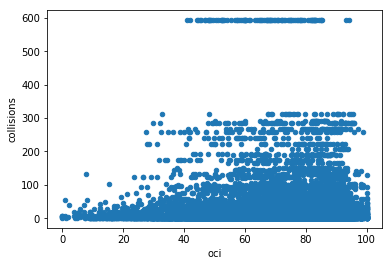

In [29]:
oci_mean = df_index_collisions['oci'].mean()
oci_max = df_index_collisions['oci'].max()
oci_min = df_index_collisions['oci'].min()

collisions_mean = df_index_collisions['collisions'].mean()
collisions_max = df_index_collisions['collisions'].max()
collisions_min = df_index_collisions['collisions'].min()
collisions_var = df_index_collisions['collisions'].var()

print("Mean oci of streets with at least one collision: " + format(oci_mean, '.3f'))
print("Max oci of streets with at least one collision: " + format(oci_max, '.3f'))
print("Min oci of streets with at least one collision: " + format(oci_min, '.3f') + "\n")

print("Mean collisions of streets with at least one collision: " + format(collisions_mean, '.3f'))
print("Max collisions of streets: " + format(collisions_max, '.0f'))
print("Min collisions of streets: " + format(collisions_min, '.0f'))
print("Collision variance of streets with at least one collision: " + format(collisions_var, '.3f'))

#oci vs collisions
df_index_collisions.plot.scatter('oci', 'collisions')